# Import Libraries & Dataset Overview

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', index_col='dt', parse_dates=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [11]:
# check missing values
df.isnull().sum()/len(df)*100

AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
Country                          0.000000
dtype: float64

In [30]:
# filter data onlu for Indonesia
data_idn = df[df['Country'] == 'Indonesia']
print(f'Shape of Indonesia Dataset : {data_idn.shape}')

Shape of Indonesia Dataset : (2265, 3)


In [31]:
# filter data that will be used
data = data_idn[['AverageTemperature']]
data.head()

,AverageTemperature
dt,
1825-01-01,25.915
1825-02-01,25.385
1825-03-01,25.687
1825-04-01,26.302
1825-05-01,25.705


In [ ]:
# plot 
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Data Exploration and Pre processing

## Missing Values Handling

In [37]:
data.isna().sum()/len(data)*100

AverageTemperature    17.041943
dtype: float64

<AxesSubplot:xlabel='dt'>

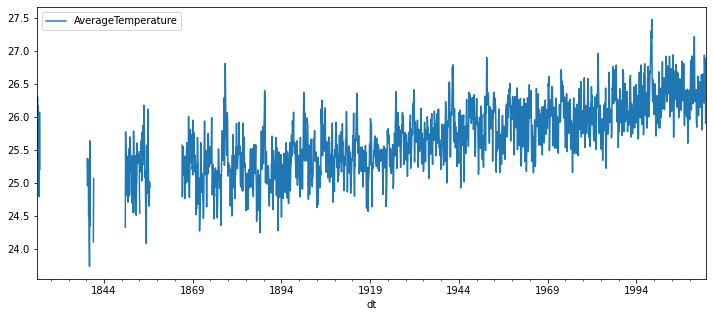

In [32]:
# visualize
data.plot(figsize=(12,5))

In [41]:
# check missing values
print('Num of missing values (pctg) :', data[data.index > '1870-12-01'].isnull().sum()/len(data)*100)
print('\n')
print('Num of missing values :', data[data.index > '1870-12-01'].isnull().sum())

Num of missing values (pctg) : AverageTemperature    0.04415
dtype: float64


Num of missing values : AverageTemperature    1
dtype: int64


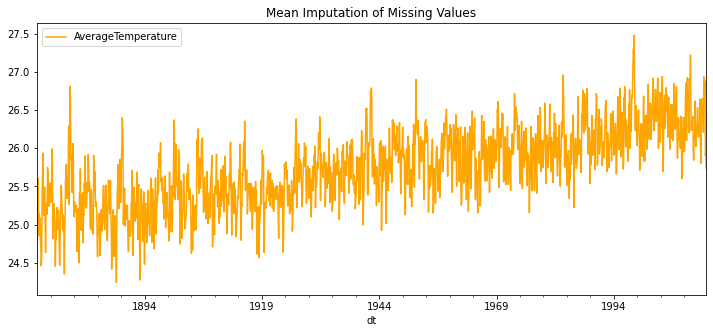

In [47]:
# we will only use data > year 1870
data = data[data.index > '1870-12-01']

# mean imputation
data['AverageTemperature'] = data['AverageTemperature'].fillna(data['AverageTemperature'].mean())

# plot
data.plot(color='orange', figsize=(12,5))
plt.title("Mean Imputation of Missing Values")
plt.show()

## Decomposition

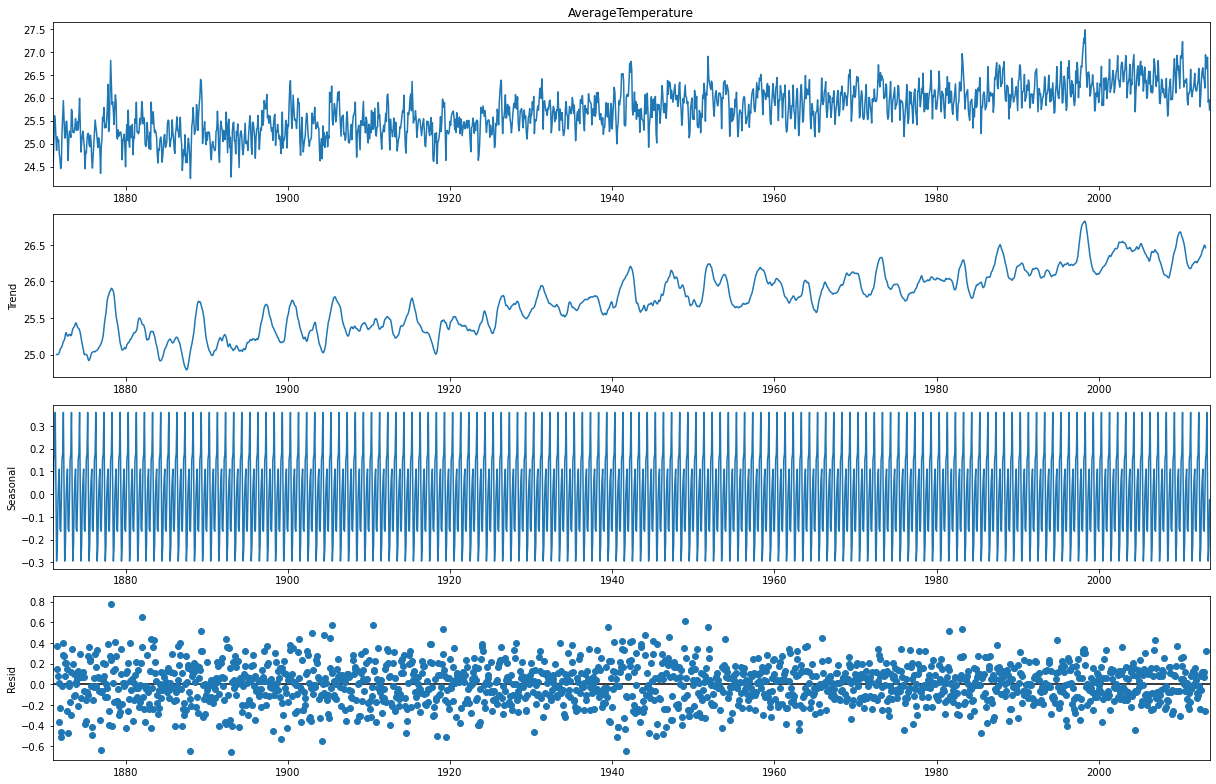

In [52]:
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (17,11)

decomposition = sm.tsa.seasonal_decompose(data['AverageTemperature'], model='additive')
decomposition.plot()
                                          
plt.show()

## Auto Arima Recomendation

Run pmdarima.auto_arima to obtain recommended orders

In [57]:
from pmdarima import auto_arima 

# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(data['AverageTemperature'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1713
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 147.354
Date:                              Sat, 23 Jul 2022   AIC                           -276.709
Time:                                      21:32:01   BIC                           -227.700
Sample:                                           0   HQIC                          -258.572
                                             - 1713                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.461      0.645      -0.001       0.001
ar.L1          0.4742      2.076      0.228      0.819      -3.595       4.543
ar.L2          0.0417      0.893      0.047      0.963      -1.708       1.791
ar.L3         -0.0166      0.135     -0.123      0.902      -0.281       0.248
ma.L1         -0.9001      2.073     -0.434      0.664      -4.963       3.163
ma.L2          0.0441      1.775      0.025      0.980      -3.435       3.523
ar.S.L12       0.9779      0.006    166.435      0.000       0.966       0.989
ma.S.L12      -0.8690      0.020    -43.243      0.000      -0.908      -0.830
sigma2         0.0507      0.002     29.587      0.000       0.047       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                15.85
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Spliting Data Train and Test

In [59]:
data.head()

,AverageTemperature
dt,
1871-01-01,24.464
1871-02-01,24.606
1871-03-01,25.121
1871-04-01,25.606
1871-05-01,25.470


In [60]:
data.tail()

,AverageTemperature
dt,
2013-05-01,26.818000
2013-06-01,26.881000
2013-07-01,25.902000
2013-08-01,25.961000
2013-09-01,25.732284


In [58]:
len(data)

1713

In [61]:
1713-27

1686

In [62]:
# Set one year for testing
train = data.iloc[:1686]
test = data.iloc[1686:]

# Modeling

## Fit Model

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit based on ARIMA order recommendation
model = SARIMAX(train['AverageTemperature'],order=(3,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79337D-02    |proj g|=  5.85344D-01

At iterate    5    f= -1.45841D-02    |proj g|=  4.43989D-02

At iterate   10    f= -2.14092D-02    |proj g|=  1.34269D-01

At iterate   15    f= -8.36677D-02    |proj g|=  1.30390D-01

At iterate   20    f= -9.84030D-02    |proj g|=  3.31537D-02

At iterate   25    f= -1.19857D-01    |proj g|=  1.76372D-01

At iterate   30    f= -1.22869D-01    |proj g|=  8.00803D-02

At iterate   35    f= -1.23366D-01    |proj g|=  1.24399D-02

At iterate   40    f= -1.23376D-01    |proj g|=  6.10624D-03

At iterate   45    f= -1.23380D-01    |proj g|=  6.31705D-03

At iterate   50    f= -1.23397D-01    |proj g|=  1.83484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                   AverageTemperature   No. Observations:                 1686
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 208.047
Date:                              Sat, 23 Jul 2022   AIC                           -400.094
Time:                                      21:48:42   BIC                           -356.658
Sample:                                  01-01-1871   HQIC                          -384.007
                                       - 06-01-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3426      0.140     -2.447      0.014      -0.617      -0.068
ar.L2          0.6434      0.085      7.569      0.000       0.477       0.810
ar.L3          0.1806      0.028      6.456      0.000       0.126       0.235
ma.L1         -0.1200      0.141     -0.852      0.394      -0.396       0.156
ma.L2         -0.8746      0.140     -6.227      0.000      -1.150      -0.599
ar.S.L12       0.9969      0.001    716.152      0.000       0.994       1.000
ma.S.L12      -0.9345      0.012    -77.221      0.000      -0.958      -0.911
sigma2         0.0449      0.001     31.920      0.000       0.042       0.048
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):                24.71
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,2)(1,0,1,12) Predictions')

In [72]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['AverageTemperature'][i]}")

predicted=25.90678379, expected=26.021
predicted=26.04931064, expected=26.136
predicted=26.29186533, expected=26.204
predicted=26.36632593, expected=26.31600000000001
predicted=26.49383639, expected=26.53
predicted=26.20038495, expected=26.22
predicted=26.15279262, expected=26.145
predicted=26.30619077, expected=26.152
predicted=26.48146119, expected=26.285
predicted=26.51708671, expected=26.359
predicted=26.77369494, expected=26.64
predicted=26.39187932, expected=26.312
predicted=26.05770653, expected=25.802
predicted=26.17752969, expected=26.065
predicted=26.38999725, expected=26.433000000000003
predicted=26.44608833, expected=26.595
predicted=26.5565224 , expected=26.651
predicted=26.25272711, expected=26.426
predicted=26.19512943, expected=26.403
predicted=26.34127568, expected=26.209
predicted=26.50975824, expected=26.934
predicted=26.54121874, expected=26.628
predicted=26.79317843, expected=26.818
predicted=26.41013083, expected=26.881
predicted=26.07461209, expected=25.902
predi

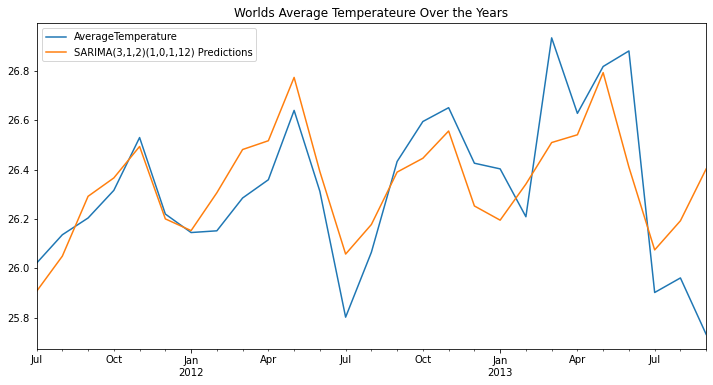

In [78]:
# Plot predictions against known values
title = 'Worlds Average Temperateure Over the Years'
ylabel=''
xlabel=''

ax = test['AverageTemperature'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Evaluate the Model

In [75]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['AverageTemperature'], predictions)
print(f'SARIMA(3,1,2)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(3,1,2)(1,0,1,12) MSE Error: 0.04774118742


In [76]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['AverageTemperature'], predictions)
print(f'SARIMA(3,1,2)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(3,1,2)(1,0,1,12) RMSE Error: 0.2184975685


In [88]:
test['AverageTemperature'].mean()

26.324454958463136

## Retrain the Model on the full data, and forecast the future

In [79]:
model = SARIMAX(data['AverageTemperature'],order=(3,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(data),len(data)+27,typ='levels').rename('SARIMA(3,1,2)(1,0,1,12) Forecast')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81957D-02    |proj g|=  5.92601D-01

At iterate    5    f= -1.36154D-02    |proj g|=  4.65602D-02

At iterate   10    f= -2.04904D-02    |proj g|=  1.10518D-01

At iterate   15    f= -9.95549D-02    |proj g|=  3.17422D-01

At iterate   20    f= -1.07694D-01    |proj g|=  7.72309D-02

At iterate   25    f= -1.10868D-01    |proj g|=  4.97724D-02

At iterate   30    f= -1.17684D-01    |proj g|=  1.95294D-01

At iterate   35    f= -1.23981D-01    |proj g|=  2.64460D-02

At iterate   40    f= -1.23996D-01    |proj g|=  1.09079D-03

At iterate   45    f= -1.24002D-01    |proj g|=  9.27319D-03

At iterate   50    f= -1.24026D-01    |proj g|=  1.52647D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


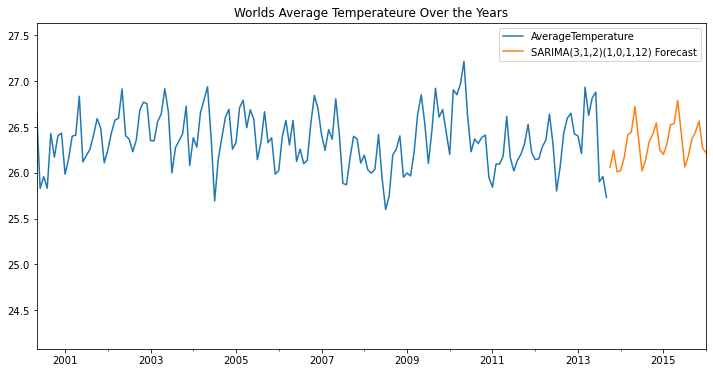

In [87]:
# Plot predictions against known values
title = 'Worlds Average Temperateure Over the Years'
ylabel=''
xlabel=''

ax = data['AverageTemperature'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.set_xlim('2000-05-01	','2016-01-01');